# Tarea 3.

Jorge Leonardo López Agredo, 2218061



Para una malla numérica con espacio $h$, la regla de Boole para aproximar integrales dice que

Otra expresion encontrada(llamemosla ``boole``):
$\int_{x_i}^{x_{i+4}}f(x)dx\approx \frac{2h}{45}\left[7f(x_i)+32f(x_{i+1})+12f(x_{i+2})+32f(x_{i+3})+7f(x_{i+4})\right]$.

A esta función la compararemos con la ya estudiada aproximación de ``Simpson``


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
%matplotlib inline
#rcParams.keys()

In [10]:
def box_print(str_w):
    hbar = len(str_w) + 4
    print('-'*hbar + '\n| ' + str_w + ' |\n' + '-'*hbar)
        

In [2]:
def boole(f,a,b,N=48):
    N = 4 * (N//4) #N must be divisible by 4
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = 2*dx/45 * np.sum(7*y[0:-1:4] + 32*y[1::4] + 12*y[2::4] + 32*y[3::4] + 7*y[4::4])
    return S

In [3]:
def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].
    
    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    h = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(h*f(x_left))
    elif method == 'right':
        x_right = x[1:]
        return np.sum(h*f(x_right))
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(h*f(x_mid))
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")
    return

In [4]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [5]:
def simps(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    where x_i = a + i*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.

    Examples
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [6]:
def PaulP(f,a,b,N=60):
    '''Approximate the integral of f(x) from a to b by Paul's Peculiar rule.

    Paul's Peculiar rule approximates the integral \int_a^b f(x) dx by the sum:
    $\int_a^bf(x)dx=\frac{2h}{9}\left[-f(a)-f(b)+16\sum_{k=0}^{n/4-1}f(x_{4k+1})
    -12\sum_{k=0}^{n/4-1}f(x_{4k+2})+16\sum_{k=0}^{n/4-1}f(x_{4k+3})
    -2\sum_{k=0}^{n/4-1}f(x_{4k})\right]$
    where x_i = a + i*h and h = (b - a)/N. 
    Addictionally, N must be a multiple of 4.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Paul's Peculiar rule with N subintervals of equal length.

    Examples
    --------
    >>> PaulP(lambda x : 3*x**2,0,1,12)
    1.0
    '''
    if N % 4 != 0:
        raise ValueError("N must be an integer multiple of 4.")
    h = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = 2*h/9 *(-f(a)-f(b)+ 16* np.sum(y[1:-2:4])-12*np.sum(y[2:-1:4]) + 16*np.sum(y[3::4])-2*np.sum(y[0:-3:4]))
    return S

In [7]:
def compute_error_of(method,func, exact_func):
    '''Compute the aproximation and the relative error.
    
    Given a method, it is taken to compute anumerical approximation of 
    the integral of the function ``func`` in the interval [0,5] 


    Parameters
    ----------
    method : Previously defined function to calculate the approximation of the integral

    func : Objetive Function to calculate the approximation
    
    exact_func : Real function obtained in the integral


    Returns
    -------
    tuple: (sol,err)
        sol: (list). Solution of the approximation
        err: (list). Relative errors of the approximation

    '''
    Exact = exact_func(5) - exact_func(0) #Exact value of the integral
    sol,err=[],[]
    for i in np.logspace(1,6,6,dtype=int):    
        Num = method(func,0,5,i) #Computing of the approximation
        sol.append(Num)
        err.append(abs(Num-Exact)/np.abs(Exact))
    return sol, err

def table_con(sol, err):
    """
    Generates a table with number of intervals (=10^N) and solution and relative error.
    """
    
    tb = pd.DataFrame(np.array([np.logspace(1,6,6,dtype=int),sol,err]).T,columns=["N","Solucion","Error"])
    display(tb)
    return 

For example: integrate the function $f(x)=\frac{1}{1+x^2}$ using Boole's method.The exact value is $F(x)=\int f(x)dx=\arctan(b)-\arctan(a)$. In the table, can be seen that the error is $O(h^7)$



,N,Solucion,Error
0,10.0,1.370524,2.094588e-03
1,100.0,1.373401,1.510045e-13
2,1000.0,1.373401,1.616750e-16
3,10000.0,1.373401,0.000000e+00
4,100000.0,1.373401,1.616750e-16
5,1000000.0,1.373401,1.616750e-16


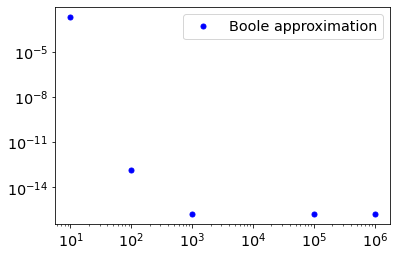

In [8]:
solution, errors = compute_error_of(boole,func = lambda x: 1 / (1+x**2), exact_func=lambda x: np.arctan(x))
plt.loglog(np.logspace(1,6,6,dtype=int),errors,'b.',markersize=10, label = 'Boole approximation')
plt.legend()
table_con(solution,errors)

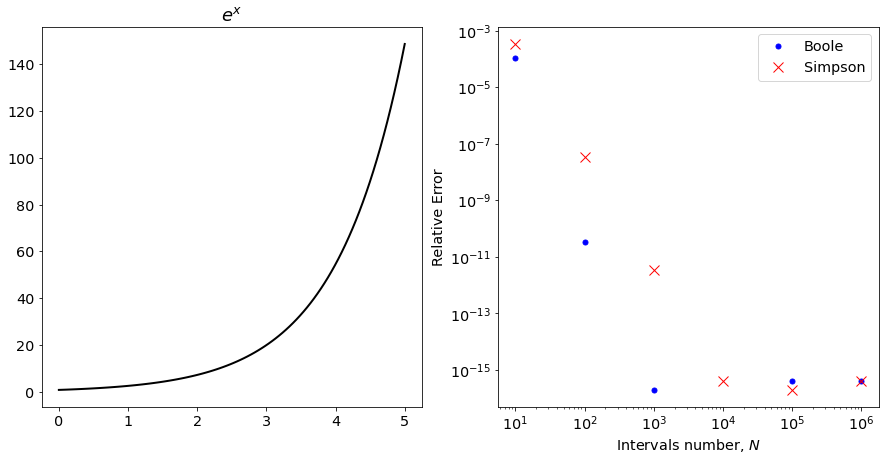

------------------
| Error de Boole |
------------------


,N,Solucion,Error
0,10.0,147.428492,1.040146e-04
1,100.0,147.413159,3.302562e-11
2,1000.0,147.413159,1.928031e-16
3,10000.0,147.413159,0.000000e+00
4,100000.0,147.413159,3.856061e-16
5,1000000.0,147.413159,3.856061e-16


--------------------
| Error de Simpson |
--------------------


,N,Solucion,Error
0,10.0,147.462860,3.371527e-04
1,100.0,147.413164,3.471189e-08
2,1000.0,147.413159,3.472383e-12
3,10000.0,147.413159,3.856061e-16
4,100000.0,147.413159,1.928031e-16
5,1000000.0,147.413159,3.856061e-16


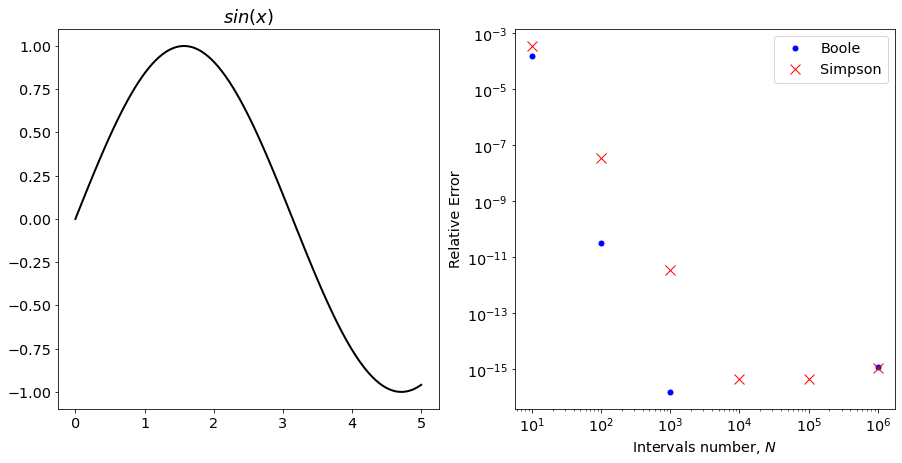

------------------
| Error de Boole |
------------------


,N,Solucion,Error
0,10.0,0.716225,1.571837e-04
1,100.0,0.716338,3.311306e-11
2,1000.0,0.716338,1.549860e-16
3,10000.0,0.716338,0.000000e+00
4,100000.0,0.716338,0.000000e+00
5,1000000.0,0.716338,1.239888e-15


--------------------
| Error de Simpson |
--------------------


,N,Solucion,Error
0,10.0,0.716594,3.578346e-04
1,100.0,0.716338,3.473256e-08
2,1000.0,0.716338,3.471840e-12
3,10000.0,0.716338,4.649579e-16
4,100000.0,0.716338,4.649579e-16
5,1000000.0,0.716338,1.084902e-15


In [11]:
xx = np.linspace(0,5,100)

plt.figure(figsize=(15,7))
plt.subplot(121)
f = lambda x: np.exp(x) # <---------
f_exact = lambda x: np.exp(x) # <---------
plt.title(r'$e^x$', fontsize = 18)
plt.plot(xx,f(xx), c='k')
plt.subplot(122)
s1, e1 = compute_error_of(boole, f, f_exact)
s2, e2 = compute_error_of(simps, f, f_exact)
plt.loglog(np.logspace(1,6,6,dtype=int),e1,'b.',markersize=10, label = 'Boole')
plt.loglog(np.logspace(1,6,6,dtype=int),e2,'rx',markersize=10, label = 'Simpson')
# plt.plot(np.logspace(1,6,6,dtype=int),err2,'rx',markersize=10, label = 'boole2')
plt.xlabel("Intervals number, $N$")
plt.ylabel("Relative Error")
plt.legend()
plt.show()    

box_print('Error de Boole')
table_con(s1,e1)
box_print('Error de Simpson')
table_con(s2,e2)

plt.figure(figsize=(15,7))
plt.subplot(121)
# g = lambda x: -x**3 # <---------
g = lambda x: np.sin(x) # <---------
g_exact = lambda x: - np.cos(x)
plt.title(r'$sin(x)$', fontsize = 18)
plt.plot(xx,g(xx), c='k')
plt.subplot(122)
s1, e1 = compute_error_of(boole, g, g_exact)
s2, e2 = compute_error_of(simps, g, g_exact)
plt.loglog(np.logspace(1,6,6,dtype=int),e1,'b.',markersize=10, label = 'Boole')
plt.loglog(np.logspace(1,6,6,dtype=int),e2,'rx',markersize=10, label = 'Simpson')
# plt.plot(np.logspace(1,6,6,dtype=int),err2,'rx',markersize=10, label = 'boole2')
plt.xlabel("Intervals number, $N$")
plt.ylabel("Relative Error")
plt.legend()
plt.show()    

box_print('Error de Boole')
table_con(s1,e1)
box_print('Error de Simpson')
table_con(s2,e2)